In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Question 8

This question involves the use of simple linear regression on the Auto
data set.
1. Use the lm() function to perform a simple linear regression with
mpg as the response and horsepower as the predictor. Use the
summary() function to print the results. Comment on the output.
For example:
- i. Is there a relationship between the predictor and the response?
- ii. How strong is the relationship between the predictor and
the response?
- iii. Is the relationship between the predictor and the response
positive or negative?
- iv. What is the predicted mpg associated with a horsepower of
98? What are the associated 95 % confidence and prediction
intervals?
2. Plot the response and the predictor. Use the abline() function
to display the least squares regression line.
3. Use the plot() function to produce diagnostic plots of the least
squares regression fit. Comment on any problems you see with
the fit.

In [7]:
## Import advertisting dataset
auto = pd.read_csv('..\..\datasets\Auto 2.csv', index_col='Unnamed: 0')
display(auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [18]:
## Using statsmodels for ouptut

## There is a significant negative relationship between the predictor and the response

linear_model = ols('mpg ~ horsepower', data=auto).fit()
print(linear_model.summary())

## Use get_predictions and summary_frame to get predictions for new values and their associated confidence Intervals
prediction = linear_model.get_prediction(exog=dict(horsepower=[98])) 
prediction.summary_frame(alpha=0.05)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           7.03e-81
Time:                        12:46:20   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


In [19]:
## Plot the regression line using plotly
## trendline arguement passed into plotly for ease of use. If you hover over the trendline you will see it is the same estimates as calculated above

fig = px.scatter(auto, x="horsepower", y="mpg", trendline='ols')

fig.show()

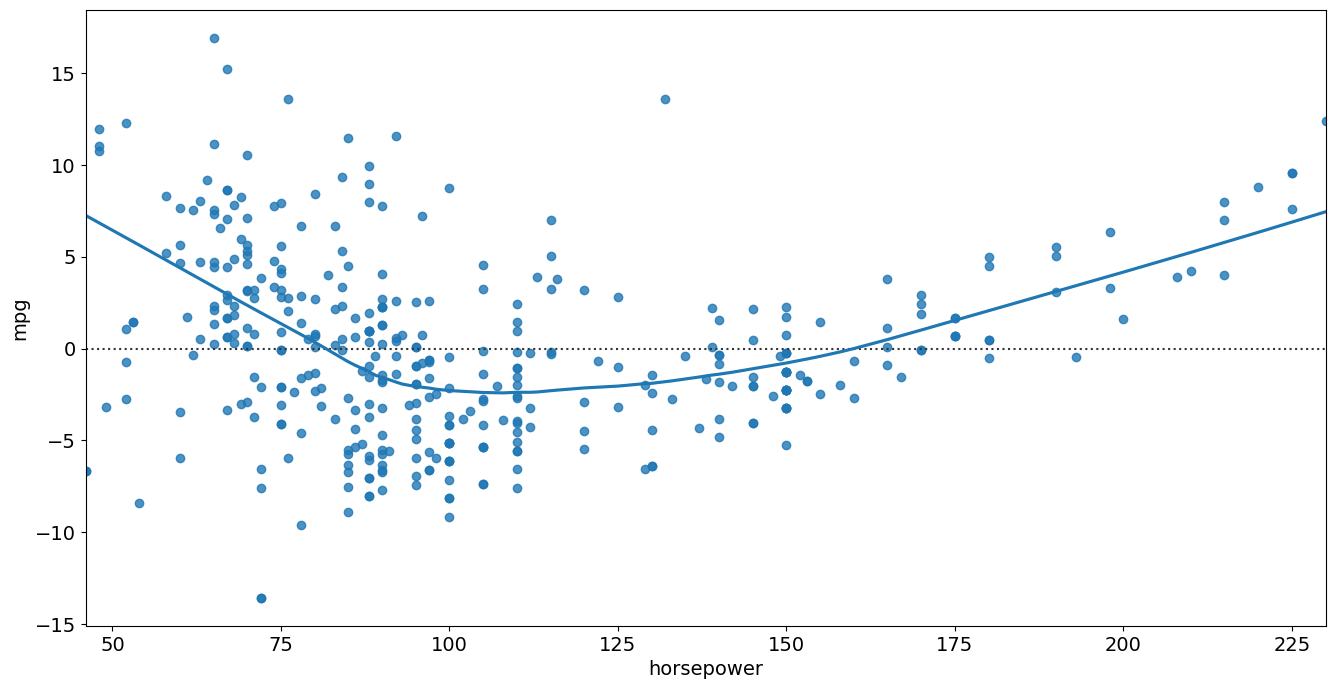

In [21]:
## Using seaborn for Residual Plot

## Showing strong signs of non-linearity

sns.residplot(x='horsepower', y='mpg', data=auto, lowess=True)
plt.show()

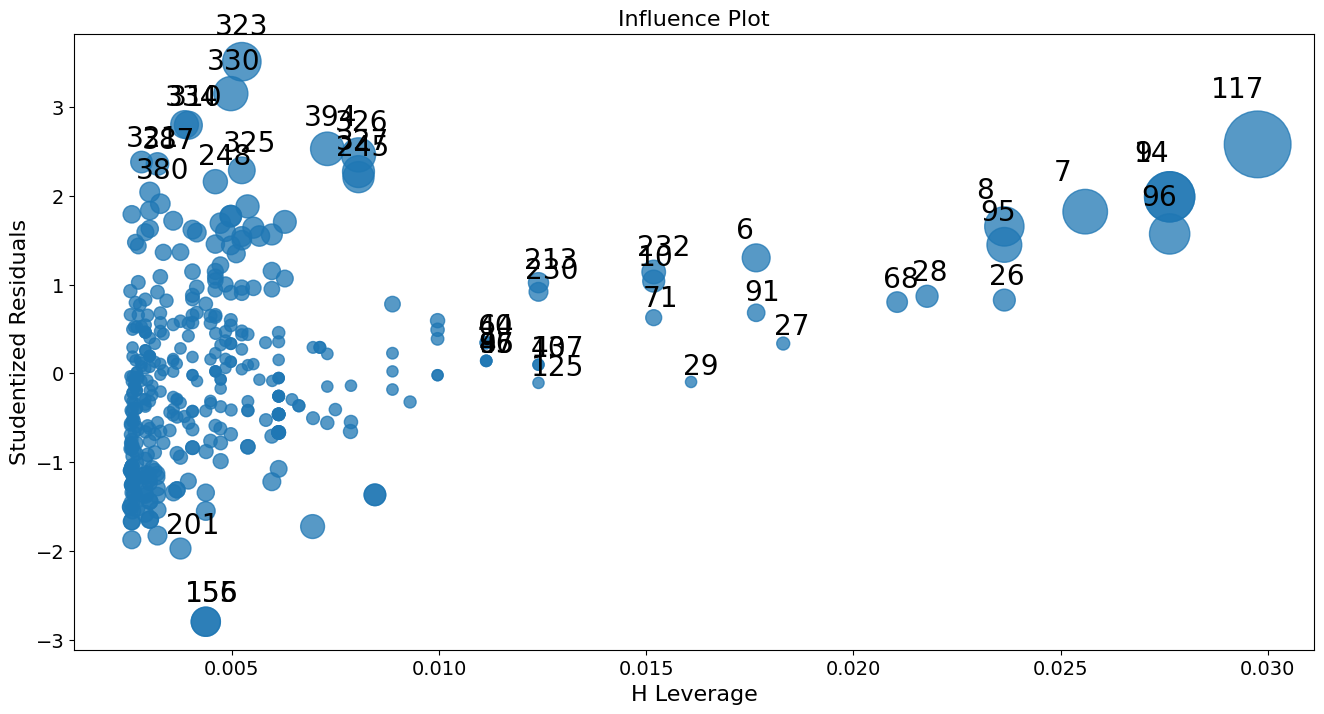

In [22]:
## Look for high leverage points

## There are many high leverage points
## Unusual values for X

sm.graphics.influence_plot(linear_model, criterion="cooks")
plt.show()

## Question 9

This question involves the use of multiple linear regression on the
Auto data set.

1. Produce a scatterplot matrix which includes all of the variables
in the data set.
2. Compute the matrix of correlations between the variables using
the function cor(). You will need to exclude the name variable, cor() which is qualitative.
3. Use the lm() function to perform a multiple linear regression
with mpg as the response and all other variables except name as
the predictors. Use the summary() function to print the results.
Comment on the output. For instance:
- Is there a relationship between the predictors and the response?
- Which predictors appear to have a statistically significant
relationship to the response?
- What does the coefficient for the year variable suggest?
4. Use the plot() function to produce diagnostic plots of the linear
regression fit. Comment on any problems you see with the fit.
Do the residual plots suggest any unusually large outliers? Does
the leverage plot identify any observations with unusually high
leverage?
5. Use the * and : symbols to fit linear regression models with
interaction effects. Do any interactions appear to be statistically
significant?
6. Try a few different transformations of the variables, such as
log(X), √
X, X2. Comment on your findings.

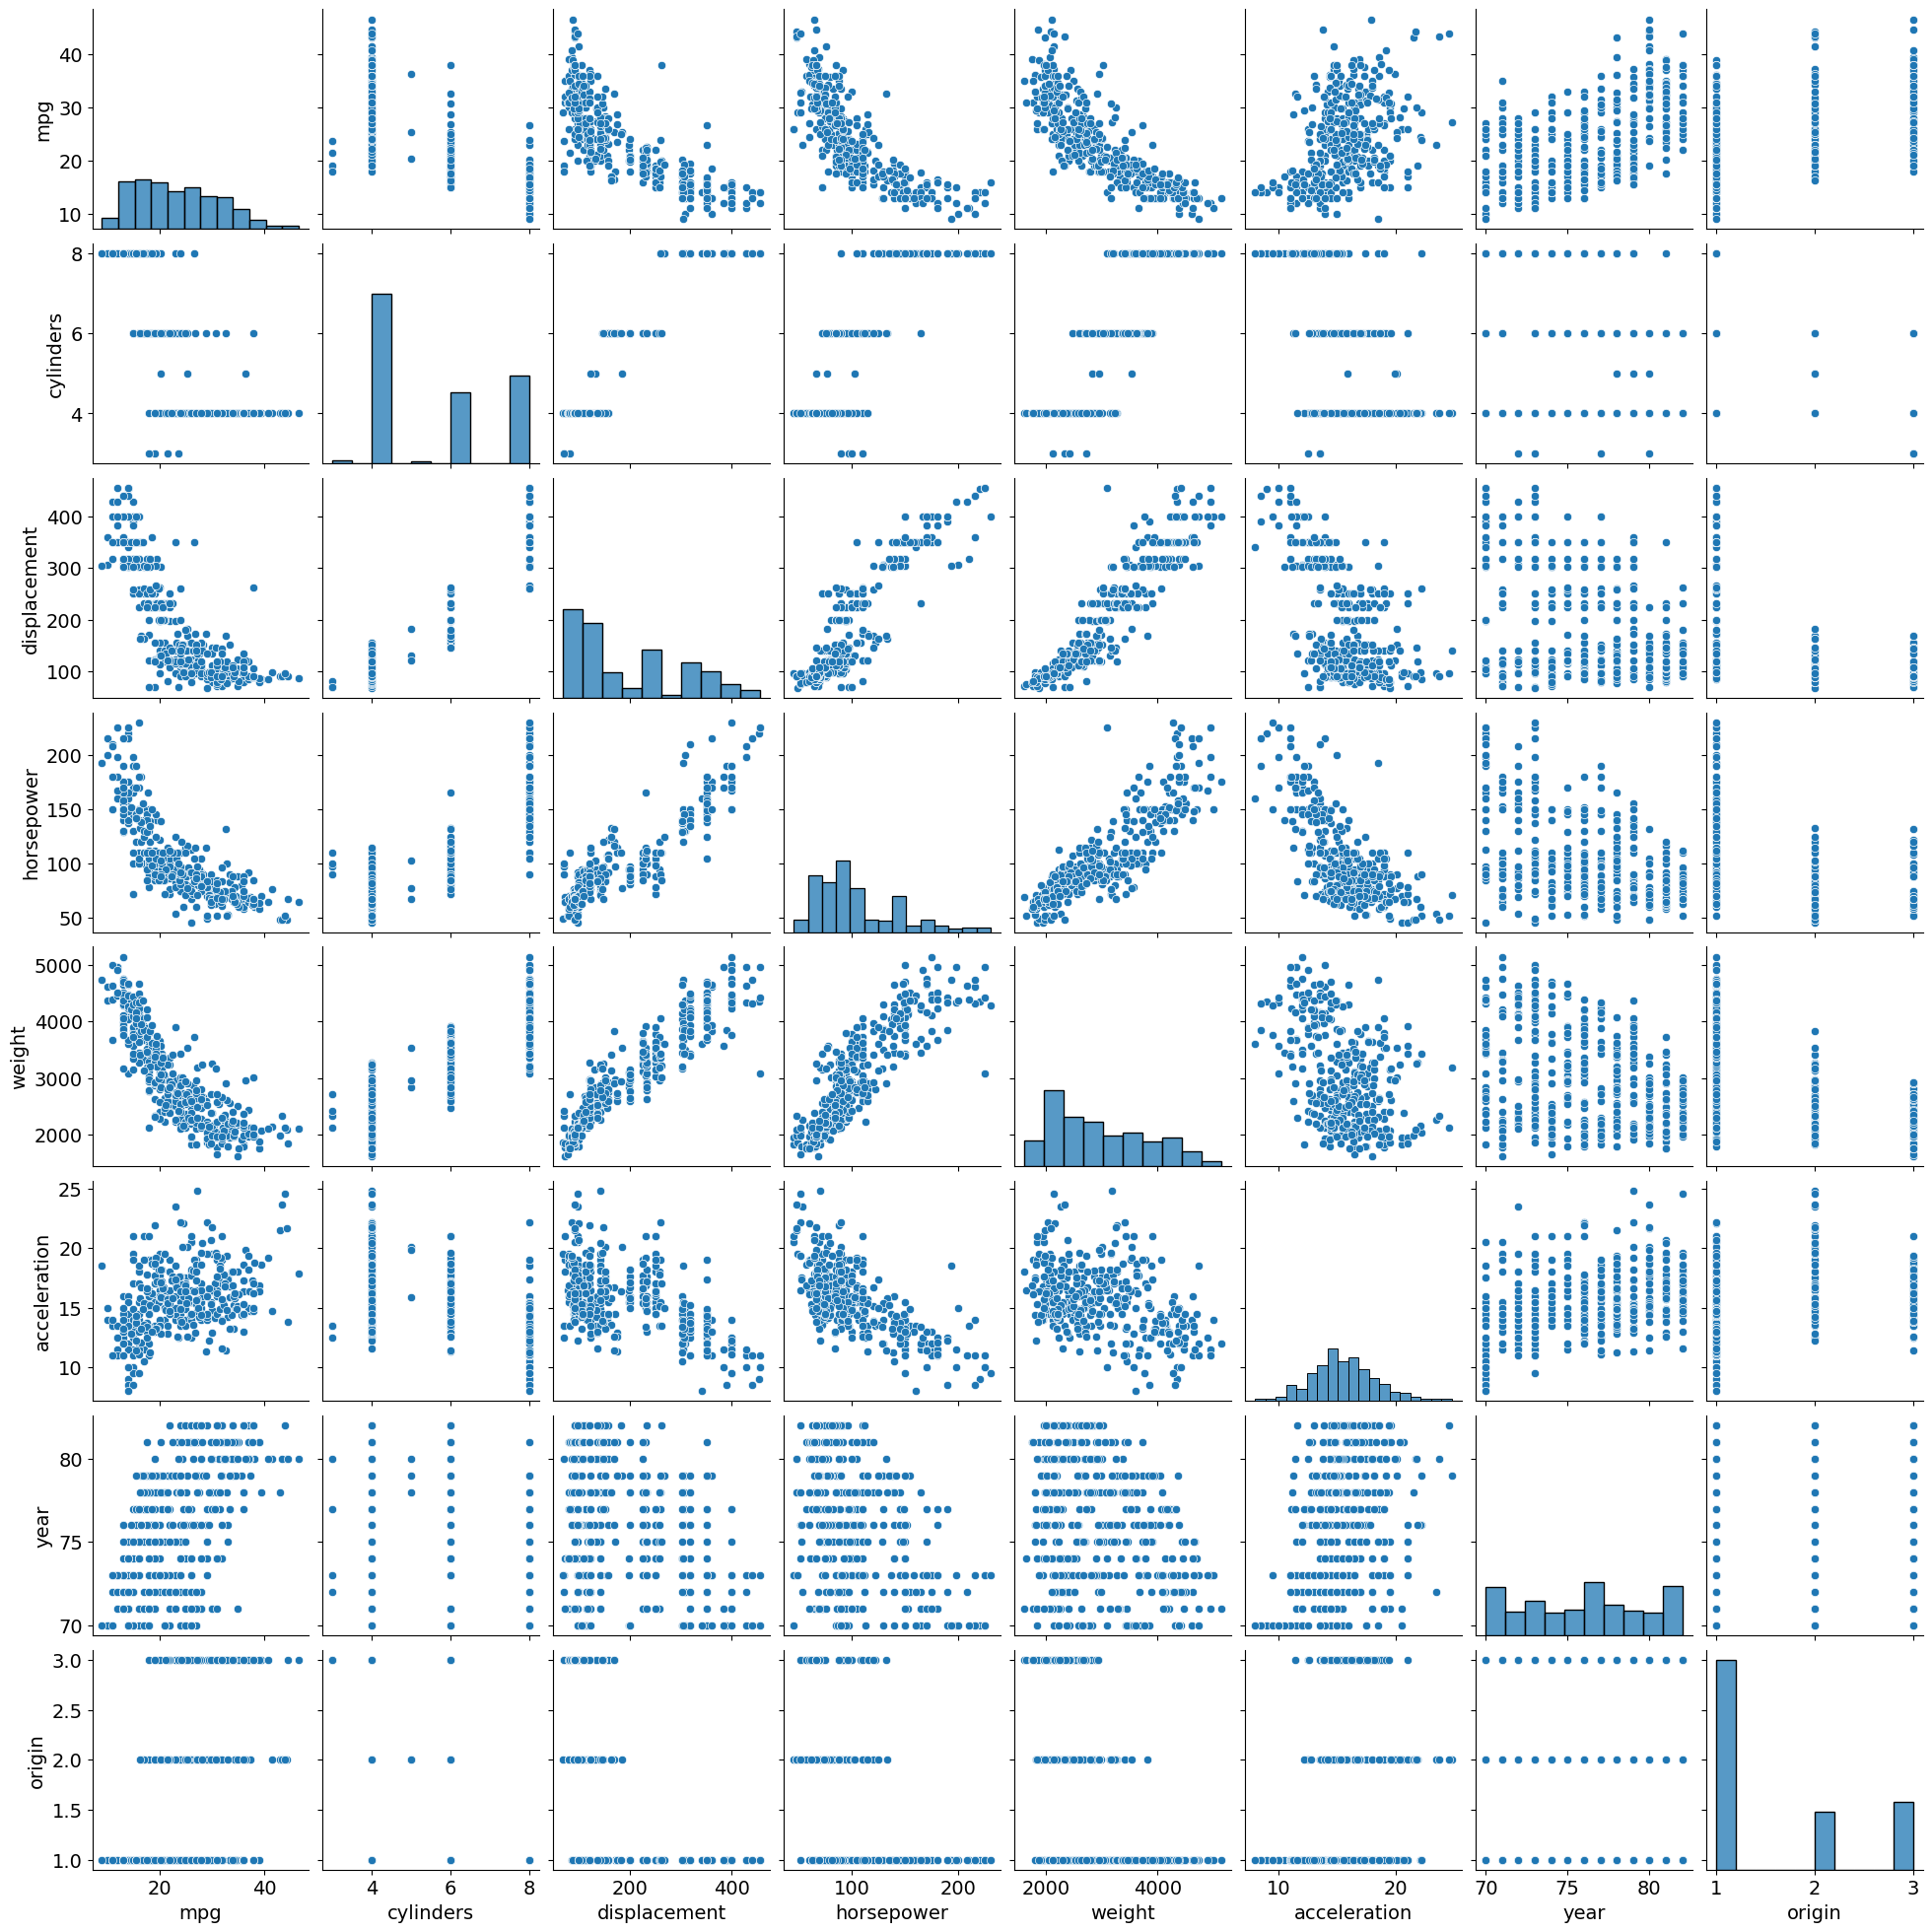

In [24]:
## Creation of scatterplot matrix with Seaborn

sns.pairplot(auto)

In [25]:
## Creation of Correlation Matrix
auto.corr()

C:\Users\lucas\AppData\Local\Temp\ipykernel_21076\668445388.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [27]:
## Perform MLR with mpg as response and all variables except name

## There is a significant relationship between at least one preidctor and the reponse based on the F-statistic and associated p-value
## All predictors except cylinders, horsepower, and acceleration appear to be statistically significant based on p-values
## The coefficient for the year variable suggests that newer cars get much better gas mileage

all_columns = "+".join(auto.drop(columns=['mpg', 'name']).columns)

linear_model = ols(f'mpg ~ {all_columns}', data=auto).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          2.04e-139
Time:                        12:55:55   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

In [36]:
## Trying with some interaction terms

linear_model = ols(f'mpg ~ {all_columns} + weight:acceleration + horsepower:cylinders', data=auto).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     266.6
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          1.09e-158
Time:                        13:09:28   Log-Likelihood:                -972.08
No. Observations:                 392   AIC:                             1964.
Df Residuals:                     382   BIC:                             2004.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.4989 

In [42]:
## Trying with some transformations

linear_model = ols(f'mpg ~ {all_columns} + weight:acceleration + horsepower:cylinders + I(weight**2)', data=auto).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     245.2
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          3.40e-159
Time:                        13:11:26   Log-Likelihood:                -967.97
No. Observations:                 392   AIC:                             1958.
Df Residuals:                     381   BIC:                             2002.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.6214 

## Question 10

This question should be answered using the Carseats data set.
1. Fit a multiple regression model to predict Sales using Price,
Urban, and US.
2. Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!
3. Write out the model in equation form, being careful to handle
the qualitative variables properly.
4. For which of the predictors can you reject the null hypothesis
H0 : βj = 0?
5. On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.
6. How well do the models in (a) and (e) fit the data?
7. Using the model from (e), obtain 95 % confidence intervals for
the coefficient(s).

In [43]:
## Import Carseats dataset
carseats = pd.read_csv('..\..\datasets\Carseats.csv', index_col='Unnamed: 0')
display(carseats)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
396,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
397,6.14,139,23,3,37,120,Medium,55,11,No,Yes
398,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
399,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [44]:
## It does not appear that Urban has a significant effect on Sales

linear_model = ols(f'Sales ~ Price + Urban + US', data=carseats).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           2.39e-23
Time:                        13:16:42   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

In [45]:
## The Linear fit for both of these models still isn't good, as shown by R2

linear_model = ols(f'Sales ~ Price + US', data=carseats).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           2.66e-24
Time:                        13:17:45   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

## Question 15

This problem involves the Boston data set, which we saw in the lab
for this chapter. We will now try to predict per capita crime rate
using the other variables in this data set. In other words, per capita
crime rate is the response, and the other variables are the predictors.
1. For each predictor, fit a simple linear regression model to predict
the response. Describe your results. In which of the models is
there a statistically significant association between the predictor
and the response? Create some plots to back up your assertions.
2. Fit a multiple regression model to predict the response using
all of the predictors. Describe your results. For which predictors
can we reject the null hypothesis H0 : βj = 0?
3. How do your results from (a) compare to your results from (b)?
Create a plot displaying the univariate regression coefficients
from (a) on the x-axis, and the multiple regression coefficients
from (b) on the y-axis. That is, each predictor is displayed as a
single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate
in the multiple linear regression model is shown on the y-axis.
4. Is there evidence of non-linear association between any of the
predictors and the response? To answer this question, for each
predictor X, fit a model of the form

In [46]:
## Import advertisting dataset
boston = pd.read_csv('..\..\datasets\Boston.csv', index_col='Unnamed: 0')
display(boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [56]:
coef_dict = {}
for col in boston.drop(columns=['crim']).columns:
    linear_model = ols(f'crim ~ {col}', data=boston).fit()
    coef_dict[col] = linear_model.params[1]

df = pd.DataFrame.from_dict(coef_dict, orient='index')

display(df)

,0
zn,-0.073935
indus,0.509776
chas,-1.892777
nox,31.248531
rm,-2.684051
age,0.107786
dis,-1.550902
rad,0.617911
tax,0.029742
ptratio,1.151983


In [47]:
## MLR

all_columns = "+".join(boston.drop(columns=['crim']).columns)

linear_model = ols(f'crim ~ {all_columns}', data=boston).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           1.57e-56
Time:                        13:21:49   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.0